In [1]:
%matplotlib inline

from dicom_utils_3 import *
import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
#import assd_func as af
from skimage import morphology
import matplotlib.patches as mpatches
import assd_func_Sobel_2 as af_Sobel
import assd_func_Sobel_v3 as af_Sobel_v3
import time
import random
from scipy.stats import uniform,norm

In [3]:
organ = "rectum" #Change this your organ

In [4]:
dicom_dir = "C:/Users/lykha/OneDrive/Documents/0_PhD_Spring_2021/Research-main/Research_MDA/Prostate Cases/1"
organ_i = 4
output_dir = "Output"
images_1, slices_1, contours_1, labels_1, dummy_mask_1 = main(dicom_dir, output_dir)

# Rectum

In [5]:
def find_roi_slices(images, labels, i):
    roi_z = []
    for j in range(images.shape[0]):
        if True in np.unique(labels[..., i][j, ...] > 0):
            roi_z.append(j)
    return roi_z

def find_organ_i(organ, contours):
    contour_table = pd.DataFrame()
    number = []
    name = []
    for i in range(len(contours)):
        number.append(contours[i]["number"])
        name.append(contours[i]["name"])
    #contour_table["number"] = number
    contour_table["name"] = name
    #print(contour_table)
    organ_i =  contour_table[contour_table["name"].str.contains(organ)].index.tolist()[0]
    return organ_i

In [6]:
organ_i_1 =  find_organ_i(organ, contours_1)
organ_i_1

4

In [7]:
roi_z_1 = find_roi_slices(images_1, labels_1, organ_i_1)

(-0.5, 511.5, 511.5, -0.5)

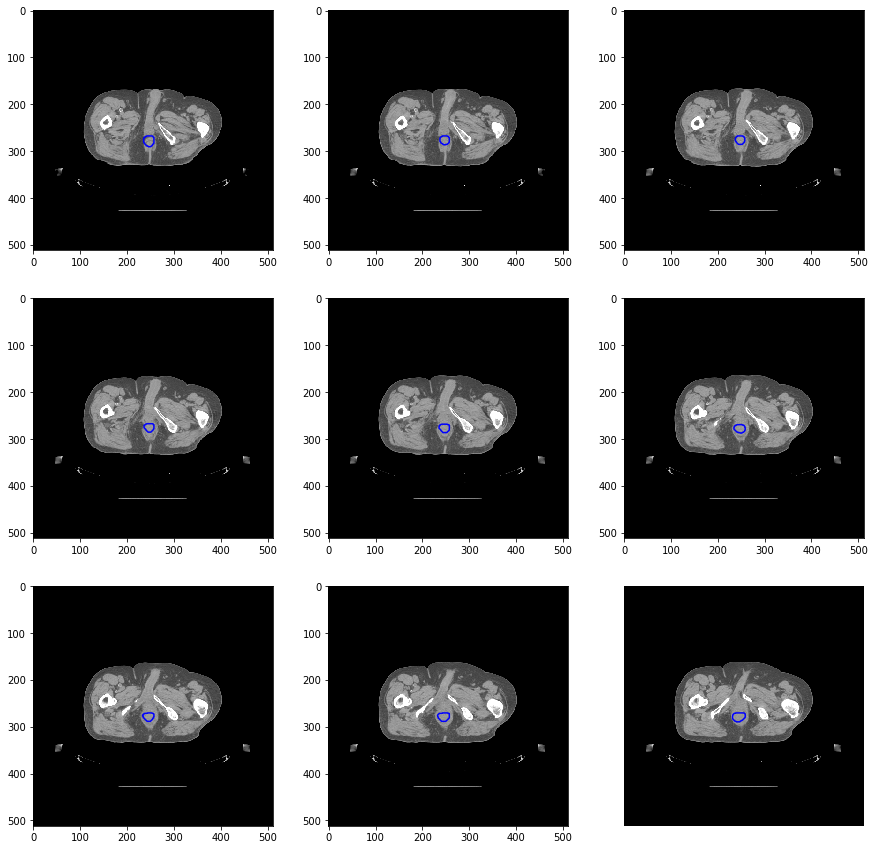

In [8]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_1[i + roi_z_1[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_1[..., organ_i_1][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

## Attempt 1 - original

In [23]:
c = 20
k = 15
w = 2
circles = 3
ismax=True
a = 50
SD=[c*1.3, c*1.3, c*3]
voxelsize = np.array([0.1076562, 0.1076562, 2.5])
assd_contour_rectum_1 = labels_1[..., organ_i_1].copy()
seed = 72

for i in roi_z_1:
    dx, dy, mask1, t, L, roi_z_1, i0 = af_Sobel.assd_Sobel(images_1[i, ...], labels_1[..., organ_i_1][i, ...], voxelsize, a, SD, circles, seed, k, w, images_1, labels_1, organ_i_1, ismax=ismax, smooth=True)
    du1 = af_Sobel.plotting_assd(dx, dy, mask1, images_1[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_1[i, ...] = du1  

In [24]:
assd_contour_rectum_1.shape

(186, 512, 512)

In [25]:
labels_1.shape

(186, 512, 512, 25)

In [26]:
roi_z_1[0]

55

(280.0, 230.0, 320.0, 260.0)

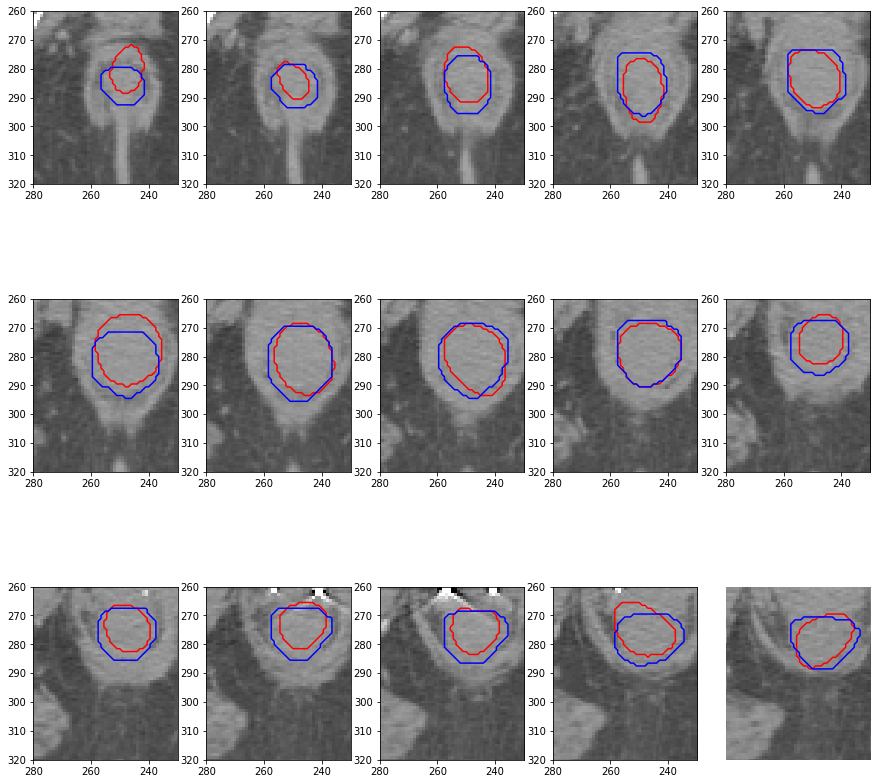

In [14]:
plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_1[roi_z_1[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_1[roi_z_1[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_1[roi_z_1[i], ..., organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(280, 230)
    plt.ylim(320, 260)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

(-0.5, 511.5, 185.5, -0.5)

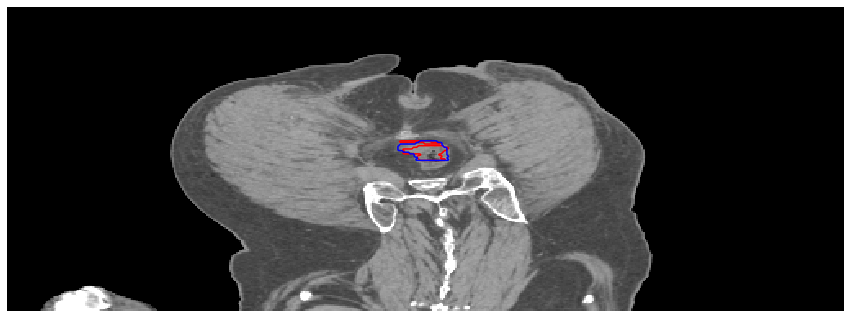

In [32]:
# Plotting along the y axis
plt.figure(figsize=(15, 15))
plt.imshow(images_1[:, 300, :], cmap="gray", vmin=-250, vmax=250)
plt.contour(assd_contour_rectum_1[:, 300, :], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.contour(labels_1[:, 300, :, organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
#plt.xlim(200, 300)
#plt.ylim(75, 100)
plt.axis('off')

(-0.5, 511.5, 185.5, -0.5)

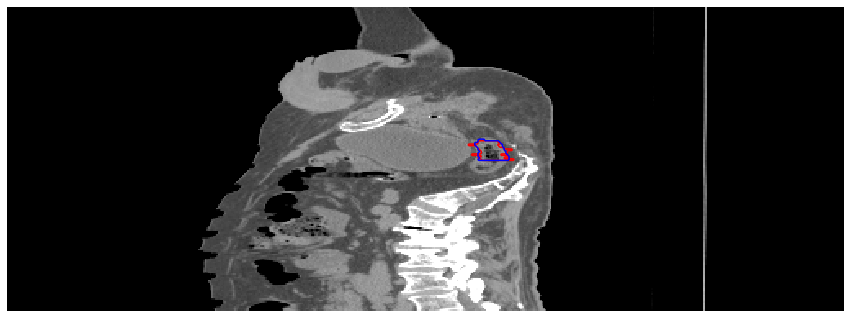

In [33]:
# Plotting along the z axis
plt.figure(figsize=(15, 15))
plt.imshow(images_1[..., 260], cmap="gray", vmin=-250, vmax=250)
plt.contour(assd_contour_rectum_1[..., 260], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.contour(labels_1[..., 260, organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
#plt.xlim(250, 340)
#plt.ylim(75, 100)
plt.axis('off')

destination_path = "Output/export-11192020"
RTStruct([assd_contour_rectum_1], ["rectum"], slices_1, fname=os.path.join(destination_path, 'Rectum_contour_subject_1.dcm'))

## Attempt 2: one i0 for all slices

In [ ]:
c = 20
k = 15
w = 2
circles = 3
ismax=True
a = 50
SD=[c*1.3, c*1.3, c*3]
voxelsize = np.array([0.1076562, 0.1076562, 2.5])
assd_contour_rectum_1 = labels_1[..., organ_i_1].copy()
seed = 72


dx, dy, mask1, t, L, roi_z_1, i0 = af_Sobel.assd_Sobel(images_1[roi_z_1[0], ...], labels_1[roi_z_1[0], ..., organ_i_1], voxelsize, a, SD, circles, seed, k, w, images_1, labels_1, organ_i_1, ismax=ismax, smooth=False)
du1 = af_Sobel_2.plotting_assd(dx, dy, mask1, images_1[roi_z_1[0], ...], quiver=False, plot=False) 
assd_contour_rectum_1[roi_z_1[0], ...] = du1  

for i in roi_z_1[1:-1]:
    dx, dy, mask1, t, L, roi_z_1, i0 = af_Sobel_v3.assd_Sobel(images_1[i, ...], labels_1[..., organ_i_1][i, ...], voxelsize, a, SD, circles, seed, k, w, images_1, labels_1, organ_i_1, i0, ismax=ismax, smooth=False)
    du1 = af_Sobel_v3.plotting_assd(dx, dy, mask1, images_1[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_1[i, ...] = du1  

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_1[roi_z_1[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_1[roi_z_1[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_1[roi_z_1[i], ..., organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(280, 230)
    plt.ylim(320, 260)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [ ]:
# Plotting along the z axis
plt.figure(figsize=(15, 15))
plt.imshow(images_1[..., 260], cmap="gray", vmin=-250, vmax=250)
plt.contour(assd_contour_rectum_1[..., 260], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.contour(labels_1[..., 260, organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.xlim(250, 340)
plt.ylim(75, 100)
plt.axis('off')

In [ ]:
# Plotting along the y axis
plt.figure(figsize=(15, 15))
plt.imshow(images_1[:, 300, :], cmap="gray", vmin=-250, vmax=250)
plt.contour(assd_contour_rectum_1[:, 300, :], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.contour(labels_1[:, 300, :, organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.xlim(200, 300)
plt.ylim(75, 100)
plt.axis('off')

## Attempt 3: Increase k:

k = 50

In [8]:
c = 20
k = 50
w = 2
circles = 3
ismax=True
a = 50
SD=[c*1.3, c*1.3, c*3]
voxelsize = np.array([0.1076562, 0.1076562, 2.5])
assd_contour_rectum_1 = labels_1[..., organ_i_1].copy()
seed = 72

for i in roi_z_1:
    dx, dy, mask1, t, L, roi_z_1, i0 = af_Sobel.assd_Sobel(images_1[i, ...], labels_1[..., organ_i_1][i, ...], voxelsize, a, SD, circles, seed, k, w, images_1, labels_1, organ_i_1, ismax=ismax, smooth=True)
    du1 = af_Sobel.plotting_assd(dx, dy, mask1, images_1[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_1[i, ...] = du1 

(200.0, 300.0, 75.0, 100.0)

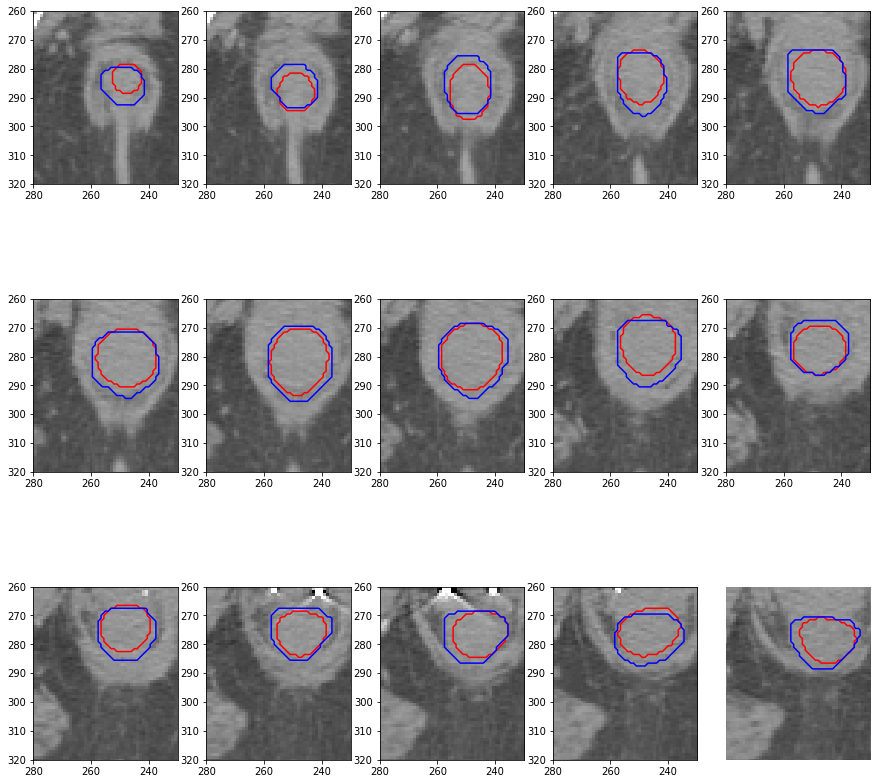

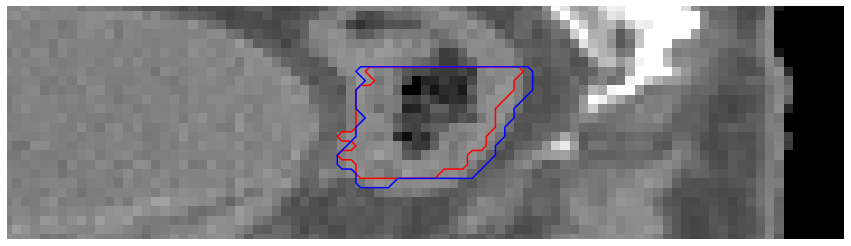

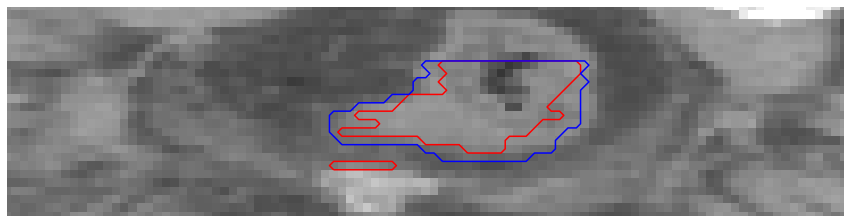

In [9]:
plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_1[roi_z_1[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_1[roi_z_1[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_1[roi_z_1[i], ..., organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(280, 230)
    plt.ylim(320, 260)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

# Plotting along the z axis
plt.figure(figsize=(15, 15))
plt.imshow(images_1[..., 260], cmap="gray", vmin=-250, vmax=250)
plt.contour(assd_contour_rectum_1[..., 260], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.contour(labels_1[..., 260, organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.xlim(250, 340)
plt.ylim(75, 100)
plt.axis('off')

# Plotting along the y axis
plt.figure(figsize=(15, 15))
plt.imshow(images_1[:, 300, :], cmap="gray", vmin=-250, vmax=250)
plt.contour(assd_contour_rectum_1[:, 300, :], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.contour(labels_1[:, 300, :, organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.xlim(200, 300)
plt.ylim(75, 100)
plt.axis('off')

k = 100

(200.0, 300.0, 75.0, 100.0)

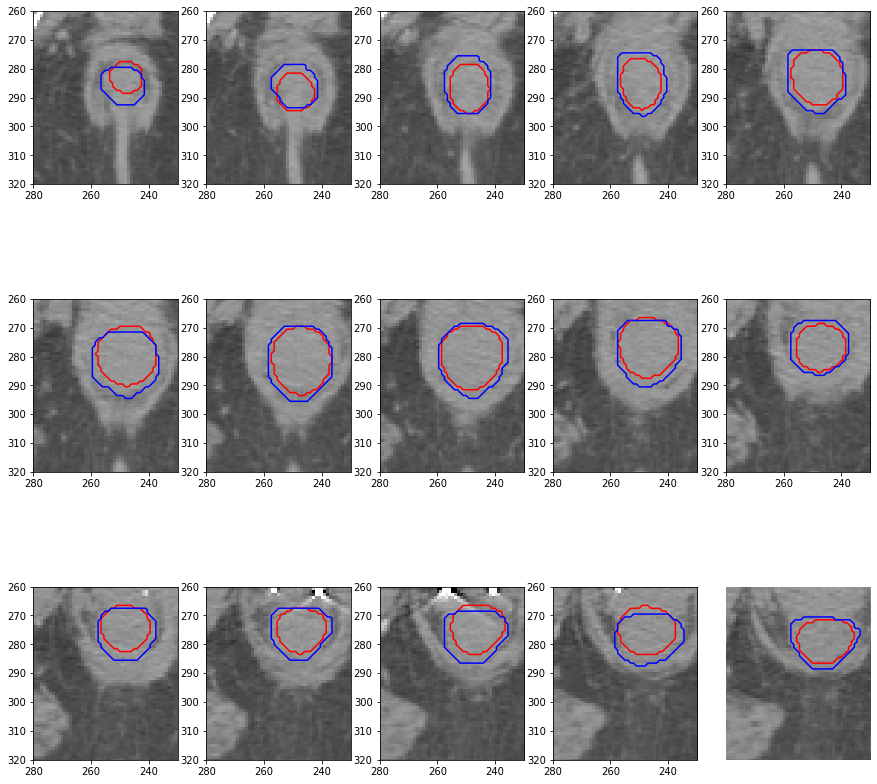

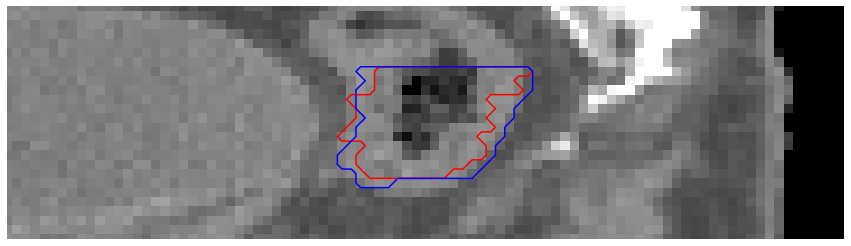

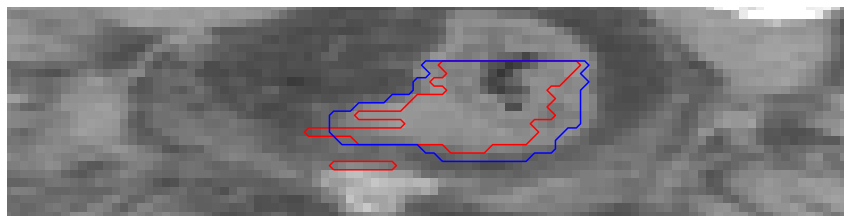

In [10]:
c = 20
k = 100
w = 2
circles = 3
ismax=True
a = 50
SD=[c*1.3, c*1.3, c*3]
voxelsize = np.array([0.1076562, 0.1076562, 2.5])
assd_contour_rectum_1 = labels_1[..., organ_i_1].copy()
seed = 72

for i in roi_z_1:
    dx, dy, mask1, t, L, roi_z_1, i0 = af_Sobel.assd_Sobel(images_1[i, ...], labels_1[..., organ_i_1][i, ...], voxelsize, a, SD, circles, seed, k, w, images_1, labels_1, organ_i_1, ismax=ismax, smooth=True)
    du1 = af_Sobel.plotting_assd(dx, dy, mask1, images_1[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_1[i, ...] = du1 
    
plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_1[roi_z_1[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_1[roi_z_1[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_1[roi_z_1[i], ..., organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(280, 230)
    plt.ylim(320, 260)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

# Plotting along the z axis
plt.figure(figsize=(15, 15))
plt.imshow(images_1[..., 260], cmap="gray", vmin=-250, vmax=250)
plt.contour(assd_contour_rectum_1[..., 260], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.contour(labels_1[..., 260, organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.xlim(250, 340)
plt.ylim(75, 100)
plt.axis('off')

# Plotting along the y axis
plt.figure(figsize=(15, 15))
plt.imshow(images_1[:, 300, :], cmap="gray", vmin=-250, vmax=250)
plt.contour(assd_contour_rectum_1[:, 300, :], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.contour(labels_1[:, 300, :, organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.xlim(200, 300)
plt.ylim(75, 100)
plt.axis('off')

# Attempt 4: Ismax = False

In [ ]:
c = 20
k = 15
w = 2
circles = 3
ismax=False
a = 50
SD=[c*1.3, c*1.3, c*3]
voxelsize = np.array([0.1076562, 0.1076562, 2.5])
assd_contour_rectum_1 = labels_1[..., organ_i_1].copy()
seed = 72

for i in roi_z_1:
    dx, dy, mask1, t, L, roi_z_1, i0 = af_Sobel.assd_Sobel(images_1[i, ...], labels_1[..., organ_i_1][i, ...], voxelsize, a, SD, circles, seed, k, w, images_1, labels_1, organ_i_1, ismax=ismax, smooth=True)
    du1 = af_Sobel.plotting_assd(dx, dy, mask1, images_1[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_1[i, ...] = du1  
    
plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_1[roi_z_1[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_1[roi_z_1[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_1[roi_z_1[i], ..., organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(280, 230)
    plt.ylim(320, 260)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

# Plotting along the z axis
plt.figure(figsize=(15, 15))
plt.imshow(images_1[..., 260], cmap="gray", vmin=-250, vmax=250)
plt.contour(assd_contour_rectum_1[..., 260], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.contour(labels_1[..., 260, organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.xlim(250, 340)
plt.ylim(75, 100)
plt.axis('off')

# Plotting along the y axis
plt.figure(figsize=(15, 15))
plt.imshow(images_1[:, 300, :], cmap="gray", vmin=-250, vmax=250)
plt.contour(assd_contour_rectum_1[:, 300, :], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
plt.contour(labels_1[:, 300, :, organ_i_1], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.xlim(200, 300)
plt.ylim(75, 100)
plt.axis('off')